# Purpose:

The purpose of this notebook is to demonstrate the ability to simulate profits utilizing the normal distribution for a manufacturing problem.  This simulation will produce a distribution of profits based on the underlying variables' distribution.  This notebook was created for an ANLY460 - Applied Analytics course.

* The assumptions are the data follow the normal distribution
* Management has decided on unit price and quantities to produce

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [15]:
sim = 1_000_000 # number of simulations

# demand mean = 50,000 and SD = 5,000
demand = np.random.normal(loc=50_000, scale=5_000, size=sim) 

# quantity to produce. 40,000. Decided by management. 
quantity_produeced = 40_000

# quantity sold = the minimum of demand and quantity produced.
quantity_sold = np.minimum(demand, quantity_produeced)

# unit cost mean $25, SD $3
unit_cost = np.random.normal(loc=25, scale=3, size=sim)

# variable cost = quantity produced * unit cost
variable_cost = quantity_produeced * unit_cost

# fixed cost mean = $10,000 and SD = $1,000
fixed_cost = np.random.normal(loc=10_000, scale=1_000, size=sim)

# unit price. $45.00. Decided by management.
unit_price = 45.00

# revenue = unit price * quantity sold
revenue = unit_price * quantity_sold

# profits
profits = revenue - fixed_cost - variable_cost

In [16]:
print(f'Mean: ${profits.mean():.2f}')
print(f'SD: ${profits.std(ddof=1):.2f}')

Mean: $788081.69
SD: $121240.48


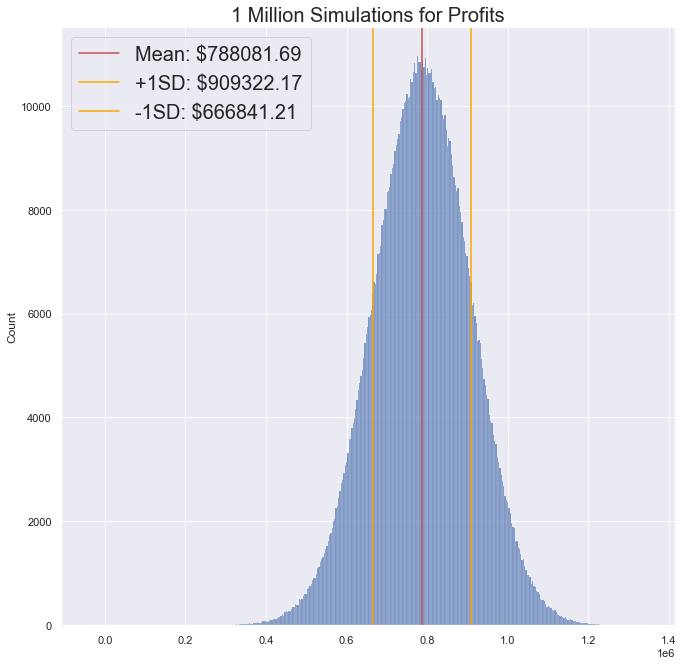

In [33]:
plt.figure(figsize=(11,11))
sns.histplot(data=profits)
plt.axvline(profits.mean(), c='r', label=f'Mean: ${profits.mean():.2f}')
plt.axvline(profits.mean()+profits.std(ddof=1), c='orange', label=f'+1SD: ${profits.mean()+profits.std(ddof=1):.2f}')
plt.axvline(profits.mean()-profits.std(ddof=1), c='orange', label=f'-1SD: ${profits.mean()-profits.std(ddof=1):.2f}')
plt.legend(fontsize=20)
plt.title('1 Million Simulations for Profits', fontsize=20);